In [2]:
# General import
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataGen
from Codes.display import Display_ker
from Codes.display import Display_im
from Codes.display import Display_epd
from Codes.myfunc import convolve

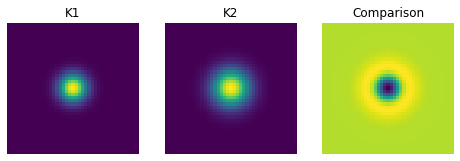

Erreur |K1 - K2|/ |K2| : 0.3500 


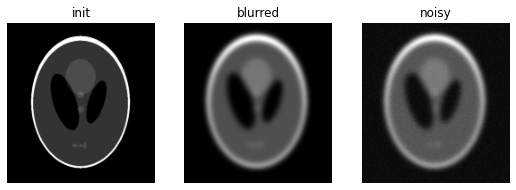

Erreur blurred |x_blurr- x_true|_2 :0.5306
Erreur |x_noisy - x_true|_2 :0.5320


In [3]:
K, K_shift, x_im, x_b, x_o1 = DataGen()

In [47]:
M,_    = K.shape
M      = M//2 # kernel middle size
Nx, Ny = x_im.shape # image size
# Kernel padding
K_pad1 = np.pad(K, ((Nx//2-M,Nx//2-M),(Ny//2-M,Ny//2-M)), 'constant')
K_pad2 = np.pad(K, ((Nx//2-M+1,Nx//2-M-1),(Ny//2-M+1,Ny//2-M-1)), 'constant')

In [48]:
x_b1 = convolve(K_pad1,x_im)
x_b2 = convolve(K_pad2,x_im)

0.0

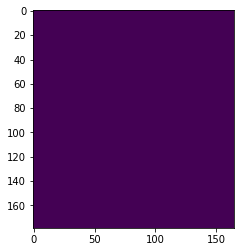

In [49]:
plt.imshow(x_b-x_b1)
np.linalg.norm(x_b-x_b1)

In [50]:
from scipy.signal import convolve2d

In [51]:
x_b3 = convolve2d(x_im,K,mode='same')

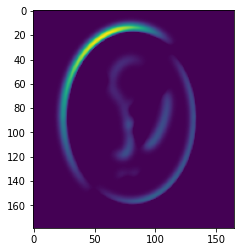

In [52]:
cc12 = x_b1-x_b2
cc12[cc12<10**-10]=0
plt.imshow(cc12)

2.8519554732797743

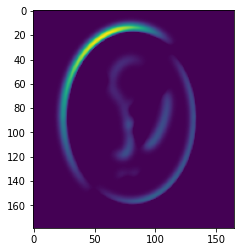

In [53]:
cc13 = x_b1-x_b3
cc13[cc13<10**-10]=0
plt.imshow(cc13)
np.linalg.norm(cc13)

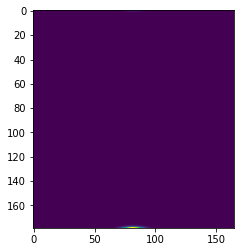

In [54]:
cc23 = x_b2-x_b3
cc23[cc23<10**-10]=0
plt.imshow(cc23)

In [55]:
np.linalg.norm(cc23)

1.3767171317465248e-07

In [56]:
x_b3.shape

(179, 165)

In [57]:
x_b2.shape

(179, 165)

In [58]:
xres = fftshift(np.real(ifft2(fft2(x_b)/fft2(K_pad1))))

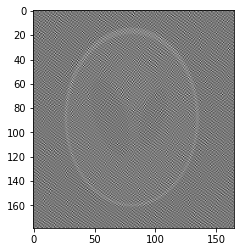

In [59]:
plt.imshow(xres,cmap='gray')

0.026193987786054654

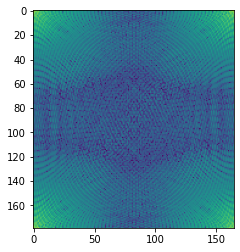

In [63]:
plt.imshow(np.abs(1+np.log(fft2(x_im))))
np.min(np.abs(fft2(x_im)))

In [64]:
np.max(np.abs(fft2(x_im)))

3152.0097252155556

In [ ]:
# TEST NABLA DIV

In [21]:
from Codes.myfunc import nablah, divh

In [43]:
v = np.random.rand(10,10)
wx,wy = np.random.rand(10,10), np.random.rand(10,10)

In [44]:
w = divh(wx,wy)
vx,vy = nablah(v)

In [45]:
np.sum(wx*vx+wy*vy)

1.9239610648515868

In [46]:
np.sum(v*w)

1.9239610648515857

In [70]:
wx,wy = np.random.rand(10,10), np.random.rand(10,10)
w = divh(wx,wy)
np.sqrt(np.sum(w**2))/np.sqrt(np.sum(wx**2+wy**2))/np.sqrt(8)

0.2442266746771581

2.8284271247461903

In [60]:
print(np.sqrt(np.sum(w**2)),np.linalg.norm(w))


6.247023116056432 6.247023116056432
